1989-05-01/1989-05-07 1989-05-15/1989-05-21


TypeError: index type not supported

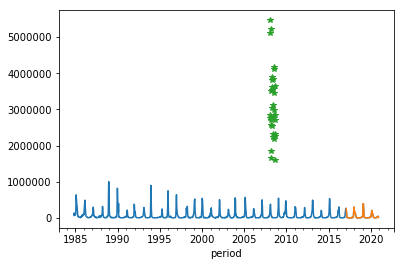

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-3.csv"

raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

raw_data[raw_data.isnull().any(axis=1)]

data = raw_data.dropna().copy()
data

def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

sorted_data = data.set_index('period').sort_index()

periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)
        
sorted_data['inc'].plot()

sorted_data['inc'][-200:].plot()

first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

yearly_incidence.plot(style='*')

yearly_incidence.sort_values()

yearly_incidence.hist(xrot=20)